In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [2]:
df = pd.read_csv("T:/GIT HUB PROJECTS/Cognifz Intern/Dataset .csv")

In [3]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
df['Aggregate rating'].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [9]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [10]:
 df = df.drop(['Restaurant ID','Longitude','Latitude','Currency','Locality Verbose'], axis =1)

In [11]:
df.shape

(9551, 16)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Address               9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Cuisines              9542 non-null   object 
 6   Average Cost for two  9551 non-null   int64  
 7   Has Table booking     9551 non-null   object 
 8   Has Online delivery   9551 non-null   object 
 9   Is delivering now     9551 non-null   object 
 10  Switch to order menu  9551 non-null   object 
 11  Price range           9551 non-null   int64  
 12  Aggregate rating      9551 non-null   float64
 13  Rating color          9551 non-null   object 
 14  Rating text           9551 non-null   object 
 15  Votes                

In [13]:
label_encode = LabelEncoder()

In [14]:
df

,Restaurant Name,Country Code,City,Address,Locality,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.4,Green,Very Good,270
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,Turkish,80,No,No,No,No,3,4.1,Green,Very Good,788
9547,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"World Cuisine, Patisserie, Cafe",105,No,No,No,No,3,4.2,Green,Very Good,1034
9548,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Italian, World Cuisine",170,No,No,No,No,4,3.7,Yellow,Good,661
9549,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,Restaurant Cafe,120,No,No,No,No,4,4.0,Green,Very Good,901


In [15]:
df['Has Table booking'] = label_encode.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = label_encode.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = label_encode.fit_transform(df['Is delivering now'])
df['Rating text'] = label_encode.fit_transform(df['Rating text'])
df['Rating color'] = label_encode.fit_transform(df['Rating color'])
df['City']=label_encode.fit_transform(df['City'])
df['Cuisines'] = label_encode.fit_transform(df['Cuisines'])
df['Restaurant Name'] = label_encode.fit_transform(df['Restaurant Name'])

In [16]:
df['Rating color'].value_counts()

Rating color
2    3737
4    2148
5    2100
1    1079
0     301
3     186
Name: count, dtype: int64

In [17]:
df

,Restaurant Name,Country Code,City,Address,Locality,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3748,162,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",920,1100,1,0,0,No,3,4.8,0,1,314
1,3172,162,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",1111,1200,1,0,0,No,3,4.5,0,1,591
2,2896,162,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",1671,4000,1,0,0,No,4,4.4,1,5,270
3,4707,162,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",1126,1500,0,0,0,No,4,4.9,0,1,365
4,5523,162,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",1122,1500,1,0,0,No,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4443,208,140,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,1813,80,0,0,0,No,3,4.1,1,5,788
9547,1310,208,140,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,1824,105,0,0,0,No,3,4.2,1,5,1034
9548,3068,208,140,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,1110,170,0,0,0,No,4,3.7,5,2,661
9549,512,208,140,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,1657,120,0,0,0,No,4,4.0,1,5,901


In [18]:
df['City'].value_counts()

City
88     5473
50     1118
89     1080
43      251
48       25
       ... 
93        1
78        1
77        1
71        1
133       1
Name: count, Length: 141, dtype: int64

In [19]:
df['Cuisines'].value_counts()

Cuisines
1306    936
1329    511
497     354
828     354
1514    334
       ... 
225       1
1548      1
599       1
200       1
1110      1
Name: count, Length: 1826, dtype: int64

In [20]:
df.shape

(9551, 16)

In [21]:
df

,Restaurant Name,Country Code,City,Address,Locality,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3748,162,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",920,1100,1,0,0,No,3,4.8,0,1,314
1,3172,162,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",1111,1200,1,0,0,No,3,4.5,0,1,591
2,2896,162,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",1671,4000,1,0,0,No,4,4.4,1,5,270
3,4707,162,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",1126,1500,0,0,0,No,4,4.9,0,1,365
4,5523,162,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",1122,1500,1,0,0,No,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4443,208,140,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,1813,80,0,0,0,No,3,4.1,1,5,788
9547,1310,208,140,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,1824,105,0,0,0,No,3,4.2,1,5,1034
9548,3068,208,140,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,1110,170,0,0,0,No,4,3.7,5,2,661
9549,512,208,140,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,1657,120,0,0,0,No,4,4.0,1,5,901


In [22]:
df['Restaurant Name'].value_counts()

Restaurant Name
1098    83
2098    79
6106    63
2716    51
4077    48
        ..
4653     1
3263     1
3024     1
3000     1
7240     1
Name: count, Length: 7446, dtype: int64

In [23]:
x = df.drop(['Address','Locality','Switch to order menu','Aggregate rating'], axis =1)

In [24]:
y = df['Aggregate rating']

In [25]:
x

,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Rating color,Rating text,Votes
0,3748,162,73,920,1100,1,0,0,3,0,1,314
1,3172,162,73,1111,1200,1,0,0,3,0,1,591
2,2896,162,75,1671,4000,1,0,0,4,1,5,270
3,4707,162,75,1126,1500,0,0,0,4,0,1,365
4,5523,162,75,1122,1500,1,0,0,4,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4443,208,140,1813,80,0,0,0,3,1,5,788
9547,1310,208,140,1824,105,0,0,0,3,1,5,1034
9548,3068,208,140,1110,170,0,0,0,4,5,2,661
9549,512,208,140,1657,120,0,0,0,4,1,5,901


In [26]:
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

<Axes: >

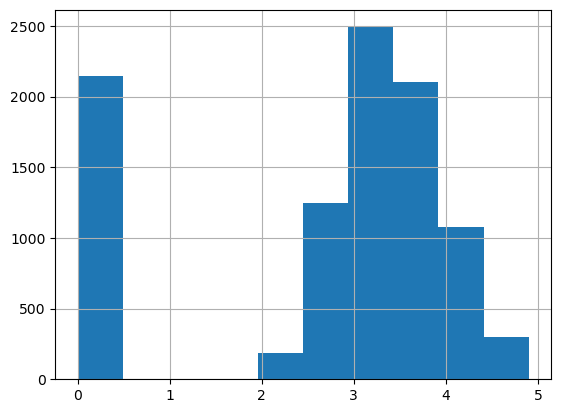

In [27]:
df['Aggregate rating'].hist()

<Axes: >

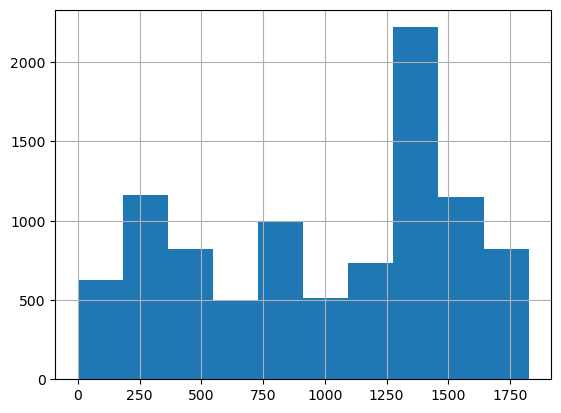

In [28]:
df['Cuisines'].hist()

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x, y , test_size =0.2, random_state = 10)

In [30]:
x

,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Rating color,Rating text,Votes
0,3748,162,73,920,1100,1,0,0,3,0,1,314
1,3172,162,73,1111,1200,1,0,0,3,0,1,591
2,2896,162,75,1671,4000,1,0,0,4,1,5,270
3,4707,162,75,1126,1500,0,0,0,4,0,1,365
4,5523,162,75,1122,1500,1,0,0,4,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4443,208,140,1813,80,0,0,0,3,1,5,788
9547,1310,208,140,1824,105,0,0,0,3,1,5,1034
9548,3068,208,140,1110,170,0,0,0,4,5,2,661
9549,512,208,140,1657,120,0,0,0,4,1,5,901


In [31]:
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()

In [34]:
sc.fit_transform(x_train)

array([[-1.42629422, -0.30635333,  0.41438435, ...,  0.6872344 ,
         0.7175032 , -0.36182176],
       [-0.57075261, -0.30635333,  0.41438435, ..., -1.31243711,
         1.90428052,  0.15690428],
       [ 0.17504432,  0.20557568, -2.48419393, ..., -0.64587994,
        -1.06266278, -0.34823069],
       ...,
       [-1.13115104, -0.30635333, -1.22958542, ..., -0.64587994,
        -1.06266278, -0.32104854],
       [ 1.49338164, -0.30635333,  0.41438435, ...,  0.6872344 ,
         0.7175032 , -0.35729141],
       [ 1.02077896, -0.30635333, -1.22958542, ..., -0.64587994,
        -1.06266278, -0.33237443]])

In [35]:
x_train_scaled = sc.fit_transform(x_test)

In [36]:
model = LinearRegression()

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [38]:
model.score(x_test,y_test)

0.45458547461155074

In [39]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()



In [40]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
rfr.score(x_test,y_test)

0.9860562449651368

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
y_predict = model.predict(x_test)

In [44]:
mse = mean_squared_error(y_test,y_predict)

In [45]:
print("MEAN SQUARED ERROR IS",mse)

MEAN SQUARED ERROR IS 1.2383938679421642


In [46]:
r2 = r2_score(y_test, y_predict)
print("MEAN SQUARED ERROR FOR LG ",mse)
print(f'R-squared Score LG : {r2}')

MEAN SQUARED ERROR FOR LG  1.2383938679421642
R-squared Score LG : 0.45458547461155074


In [47]:
y_predict1 = rfr.predict(x_test)
mse1 = mean_squared_error(y_test,y_predict1)
r21 = r2_score(y_test, y_predict)

In [48]:
print("MEAN SQUARED ERROR FOR RF ",mse1)
print(f'R-squared Score RF : {r21}')

MEAN SQUARED ERROR FOR RF  0.03166006757697557
R-squared Score RF : 0.45458547461155074


In [49]:
alpha = 0.01  # The regularization strength (you can adjust this)
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(x_train, y_train)


Lasso(alpha=0.01)

In [50]:
y_pred03= lasso_model.predict(x_test)

In [51]:
mse03 = mean_squared_error(y_test, y_pred03)
r22= r2_score(y_test, y_pred03)
print(f'R-squared Score: {r22}')

print(f'Mean Squared Error: {mse03}')

R-squared Score: 0.4544546742890736
Mean Squared Error: 1.2386908573139914


In [52]:
lasso_model.predict([[3748,162,73,920,1100,1,0,0,3,0,1,314]])

C:\Users\tharukesh\.designer\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([4.86333041])

In [53]:
df

,Restaurant Name,Country Code,City,Address,Locality,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3748,162,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",920,1100,1,0,0,No,3,4.8,0,1,314
1,3172,162,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",1111,1200,1,0,0,No,3,4.5,0,1,591
2,2896,162,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",1671,4000,1,0,0,No,4,4.4,1,5,270
3,4707,162,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",1126,1500,0,0,0,No,4,4.9,0,1,365
4,5523,162,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",1122,1500,1,0,0,No,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4443,208,140,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,1813,80,0,0,0,No,3,4.1,1,5,788
9547,1310,208,140,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,1824,105,0,0,0,No,3,4.2,1,5,1034
9548,3068,208,140,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,1110,170,0,0,0,No,4,3.7,5,2,661
9549,512,208,140,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,1657,120,0,0,0,No,4,4.0,1,5,901
